# Effective potential for geodesic motion in Schwarzschild spactime

This Jupyter/SageMath worksheet is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_effective_potential.ipynb) to download the worksheet file (ipynb format). To run it, you must start SageMath with the Jupyter notebook, with the command `sage -n jupyter`


In [1]:
%display latex

In [2]:
version()

'SageMath version 8.1.rc3, Release Date: 2017-11-23'

## Effective potential

In [3]:
var('r L')
V(r,L) = - 1/r + L^2/(2*r^2) - L^2/r^3
V(r,L)

1/2*L^2/r^2 - L^2/r^3 - 1/r

In [4]:
l_values = [0, 2, 3.0, 2*sqrt(3), 3.8, 4.2, 4.6, 5.0]

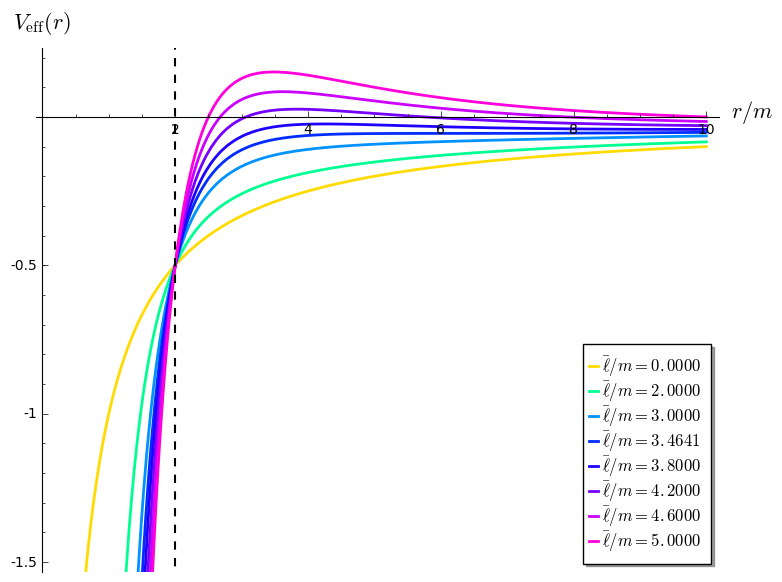

In [5]:
graph = Graphics()
for l in l_values:
    graph += plot(V(r,l), (r, 0.1, 10), plot_points=300, 
                  legend_label="$\\bar\\ell/m = {:.4f}$".format(float(l)),
                  color=hue((1+l)/7), thickness=2,
                  xmin=0, xmax=10, ymin=-1.5, ymax=0.2,
                  axes_labels=[r'$r/m$', r'$V_{\rm eff}(r)$'])
graph += line([(2,-1.6), (2,0.25)], color='black', thickness=1.5, linestyle='--')
graph

In [6]:
graph.save("ges_eff_pot.pdf", legend_loc="lower right")

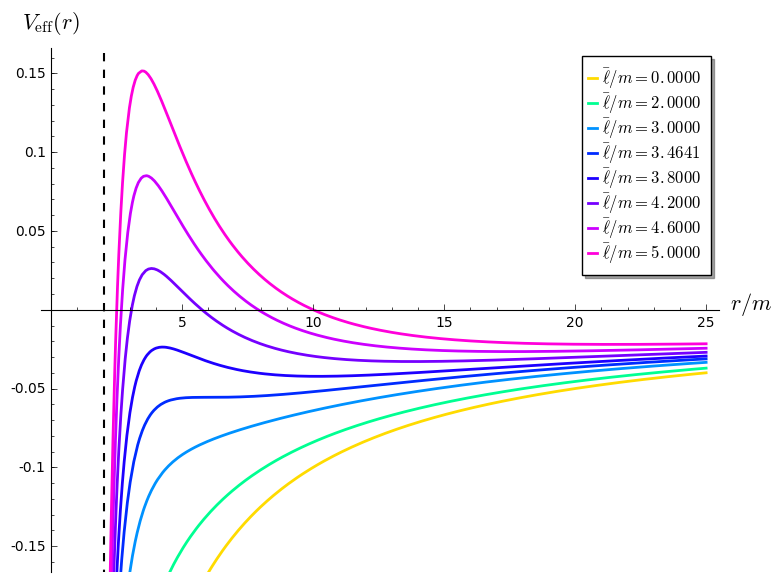

In [7]:
graph = Graphics()
for l in l_values:
    graph += plot(V(r,l), (r, 0.1, 25), plot_points=300, 
                  legend_label="$\\bar\\ell/m = {:.4f}$".format(float(l)),
                  color=hue((1+l)/7), thickness=2,
                  xmin=0, xmax=25, ymin=-0.16, ymax=0.16,
                  axes_labels=[r'$r/m$', r'$V_{\rm eff}(r)$'])
graph += line([(2,-0.17), (2,0.17)], color='black', thickness=1.5, linestyle='--')
graph

In [8]:
V(2,L)

-1/2

## Circular orbits

Circular orbits are obtained by imposing $\mathrm{d}r/\mathrm{d}\tau = 0$ and $\mathrm{d}^2r/\mathrm{d}\tau^2 = 0$, which imply $\mathrm{d}V/\mathrm{d}r=0$:

In [9]:
diff(V(r,L),r)

-L^2/r^3 + 3*L^2/r^4 + 1/r^2

In [10]:
s = solve(diff(V(r,L),r)==0, r)
s

[r == 1/2*L^2 - 1/2*sqrt(L^2 - 12)*L, r == 1/2*L^2 + 1/2*sqrt(L^2 - 12)*L]

In [11]:
for l in l_values:
    r1 = s[0].subs(L=l).rhs()
    r2 = s[1].subs(L=l).rhs()
    print("l={}: r1={}, r2={}".format(l, r1, r2))

l=0: r1=0, r2=0
l=2: r1=-2*sqrt(-2) + 2, r2=2*sqrt(-2) + 2
l=3.00000000000000: r1=4.50000000000000 - 2.59807621135332*I, r2=4.50000000000000 + 2.59807621135332*I
l=2*sqrt(3): r1=6, r2=6
l=3.80000000000000: r1=4.25210512315547, r2=10.1878948768445
l=4.20000000000000: r1=3.83277632344408, r2=13.8072236765559
l=4.60000000000000: r1=3.61893686280608, r2=17.5410631371939
l=5.00000000000000: r1=3.48612181134003, r2=21.5138781886600


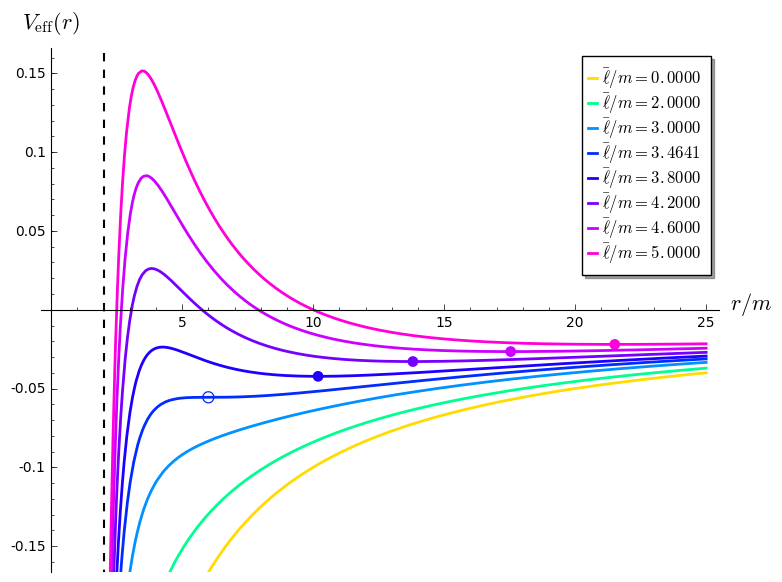

In [12]:
for l in l_values:
    if l>=2*sqrt(3):
        r2 = s[1].subs(L=l).rhs()
        V2 = V(r2,l)
        if l== 2*sqrt(3):
            graph += point((r2,V2), color=hue((1+l)/7), size=80, 
                           marker=r'$\circ$')
        else:
            graph += point((r2,V2), color=hue((1+l)/7), size=60)
graph

In [13]:
graph.save("ges_eff_pot_zoom.pdf")

Coordinate $r$ on a circular orbit of angular momentum $L$:

In [14]:
r1 = s[0].rhs()
r2 = s[1].rhs()
r1, r2

(1/2*L^2 - 1/2*sqrt(L^2 - 12)*L, 1/2*L^2 + 1/2*sqrt(L^2 - 12)*L)

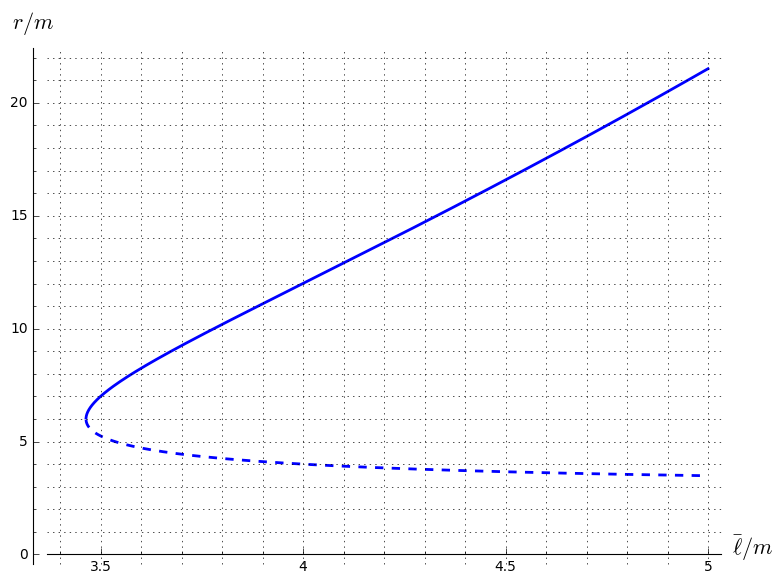

In [15]:
graph = plot(r1, (L, 2*sqrt(3), 5), linestyle='--', thickness=2)
graph += plot(r2, (L, 2*sqrt(3), 5), thickness=2)
show(graph, xmin=3.4, xmax=5, ymin=0, ymax=22, gridlines='minor',
     axes_labels=[r'$\bar\ell/m$', r'$r/m$'])

In [16]:
L_circ = r / sqrt(r-3)
L_circ

r/sqrt(r - 3)

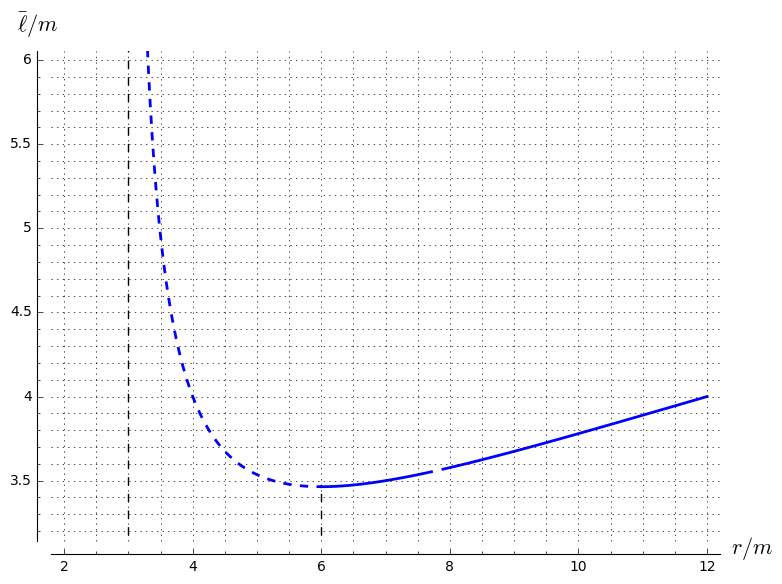

In [17]:
graph = plot(L_circ, (r, 3.2, 6), linestyle='--', thickness=2)
graph += plot(L_circ, (r, 6, 12), thickness=2, plot_points=100)
graph += line([(3,0), (3, 8)], color='black', linestyle='--')
graph += line([(6,0), (6, 2*sqrt(3))], color='black', linestyle='--')
show(graph, xmin=2, xmax=12, ymin=3.2, ymax=6, gridlines='minor',
     axes_labels=[r'$r/m$', r'$\bar\ell/m$'])

In [18]:
graph.save("ges_ell_circ_orbit.pdf", xmin=2, xmax=12, ymin=3.2, ymax=6, 
           gridlines='minor', axes_labels=[r'$r/m$', r'$\bar\ell/m$'])

In [19]:
V_circ = V(r, L_circ).simplify_full()
V_circ

-1/2*(r - 4)/(r^2 - 3*r)

In [20]:
E_circ = sqrt(2*V_circ + 1).simplify_full()
E_circ

sqrt((r^2 - 4*r + 4)/(r^2 - 3*r))

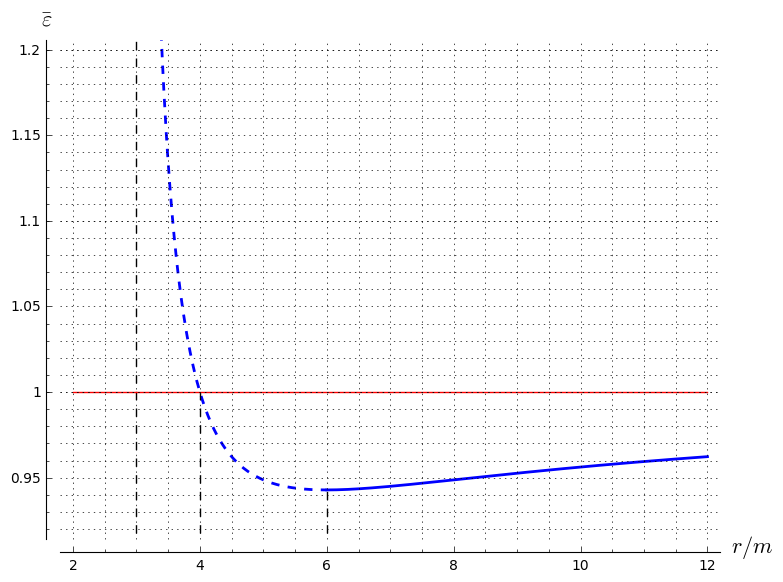

In [21]:
graph = plot(E_circ, (r, 3.2, 6), linestyle='--', thickness=2)
graph += plot(E_circ, (r, 6, 12), thickness=2)
graph += line([(3,0), (3, 8)], color='black', linestyle='--')
graph += line([(6,0), (6, 4/(3*sqrt(2)))], color='black', linestyle='--')
graph += line([(4,0), (4, 1)], color='black', linestyle='--')
graph += line([(2,1), (12, 1)], color='red')
show(graph, xmin=2, xmax=12, ymin=0.92, ymax=1.2, gridlines='minor',
     axes_labels=[r'$r/m$', r'$\bar\varepsilon$'])

In [22]:
graph.save("ges_ener_circ_orbit.pdf", xmin=2, xmax=12, ymin=0.92, 
           ymax=1.2, gridlines='minor',
           axes_labels=[r'$r/m$', r'$\bar\varepsilon$'])

In [23]:
diff(E_circ, r).simplify_full()

1/2*(r^2 - 8*r + 12)/((r^4 - 6*r^3 + 9*r^2)*sqrt((r^2 - 4*r + 4)/(r^2 - 3*r)))

In [24]:
E_circ.subs(r=6)

2/3*sqrt(2)

In [25]:
n(_)

0.942809041582063

In [26]:
(E_circ / L_circ).simplify_full()

sqrt(r - 3)*sqrt((r^2 - 4*r + 4)/(r^2 - 3*r))/r

## Non-circular orbits 

In [27]:
l0 = 4.2
E0 = 0.973
V0 = (E0^2-1)/2
V0

-0.0266355000000000

In [28]:
sol = solve(V(r,l0) == V0, r)
for s in sol:
    show(CDF(s.rhs()))

9.057744757322917 - 8.881784197001252e-16*I

2.8523655362737035 + 8.881784197001252e-16*I

25.633769115462716

In [29]:
r1 = CDF(sol[0].rhs()).real_part()
r2 = CDF(sol[2].rhs()).real_part()
r1, r2

(9.057744757322917, 25.633769115462716)

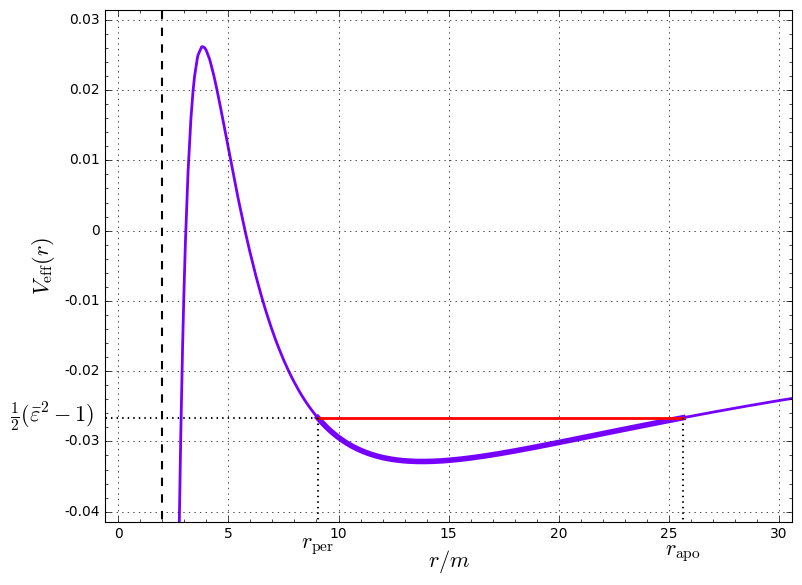

In [30]:
graph = plot(V(r,l0), (r, 2.7, 31), plot_points=300, color=hue((1+l0)/7), 
             thickness=2, axes_labels=[r'$r/m$', r'$V_{\rm eff}(r)$'])
graph += plot(V(r,l0), (r, r1, r2), color=hue((1+l0)/7), thickness=4)
graph += line([(2,-0.17), (2,0.17)], color='black', thickness=1.5, linestyle='--')
graph += line([(r1,V0), (r2,V0)], color='red', thickness=2)
graph += line([(r1,V0), (r1,2*V0)], color='black', thickness=1.5, linestyle=':') + \
         text(r'$r_{\rm per}$', (r1, -0.045), color='black', fontsize=16)
graph += line([(r2,V0), (r2,2*V0)], color='black', thickness=1.5, linestyle=':') + \
         text(r'$r_{\rm apo}$', (r2, -0.046), color='black', fontsize=16)
graph += line([(r1,V0), (-1,V0)], color='black', thickness=1.5, linestyle=':') + \
         text(r'$\frac{1}{2}(\bar{\varepsilon}^2-1)$', (-3, V0), color='black', 
              fontsize=16)
show(graph, xmin=0, xmax=30, ymin=-0.04, ymax=0.03, 
     gridlines=True, frame=True, axes=False)

In [31]:
graph.save("ges_eff_pot_bound.pdf", xmin=0, xmax=30, ymin=-0.04, ymax=0.03, 
           gridlines=True, frame=True, axes=False)